# Определение возраста покупателей

## Описание проекта 


Для сетевого супермаркета **<<Хлеб-Соль>>**  тебуется построить модель, способнкю по фотографии, в предкассовой зоне, определять приблизительный возраст человека.


Чтобы :
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы.
* Контролировать добросовестность кассиров при продаже алкоголя.


Для обучения модели:
* Предоставлен открытый dataset c проекта ChaLearn Looking at People.

## Исследовательский анализ данных

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.style.use('dark_background')

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.columns

Index(['file_name', 'real_age'], dtype='object')

In [4]:
print('Размер выборки:', labels.shape)

Размер выборки: (7591, 2)


In [5]:
'dupli:',labels['file_name'].duplicated().sum(),'isna:', labels['file_name'].isna().sum()

('dupli:', 0, 'isna:', 0)

<Figure size 432x288 with 0 Axes>

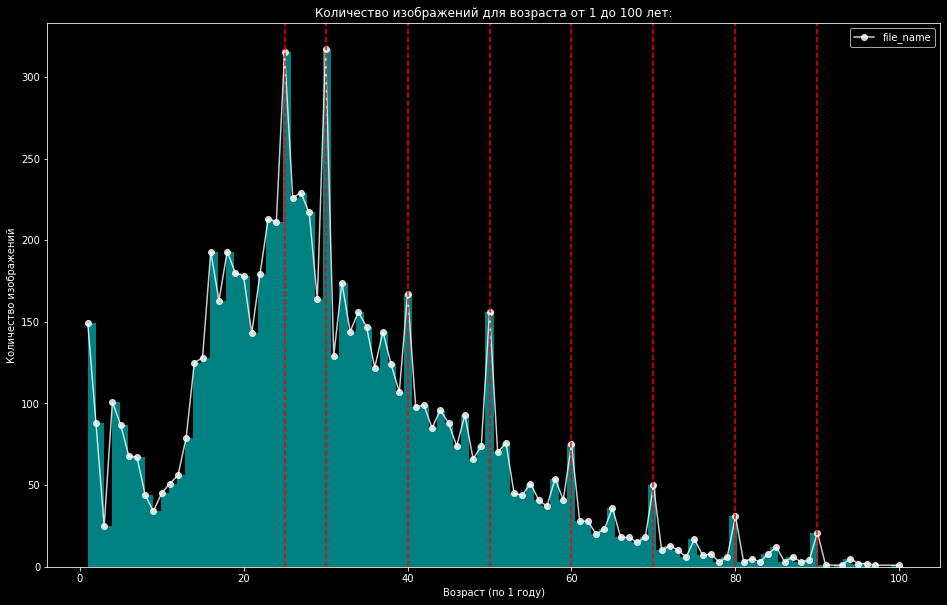

In [6]:
plt.figure()
labels.groupby('real_age').agg('count').plot(color = 'white', figsize = (16,10), style = '-o', alpha = 0.8)
plt.title('Количество изображений для возраста от 1 до 100 лет:')
labels['real_age'].plot(color = 'teal',alpha = 1, figsize = (16,10), kind = 'hist', bins = 100)
plt.xlabel('Возраст (по 1 году)')
plt.ylabel('Количество изображений')

for i in range(30,95,10):
    plt.axvline(x= i, color = 'red', linestyle = '--')
plt.axvline(x= 25, color = 'red', linestyle = '--')    
plt.show()

* В данных наблюдаются скачки количества изображений кратных 5 и 10.
* Подобное может быть вызванно не точной разметкой данных, что скажется на попытке предсказать точный возраст, а не округленный.

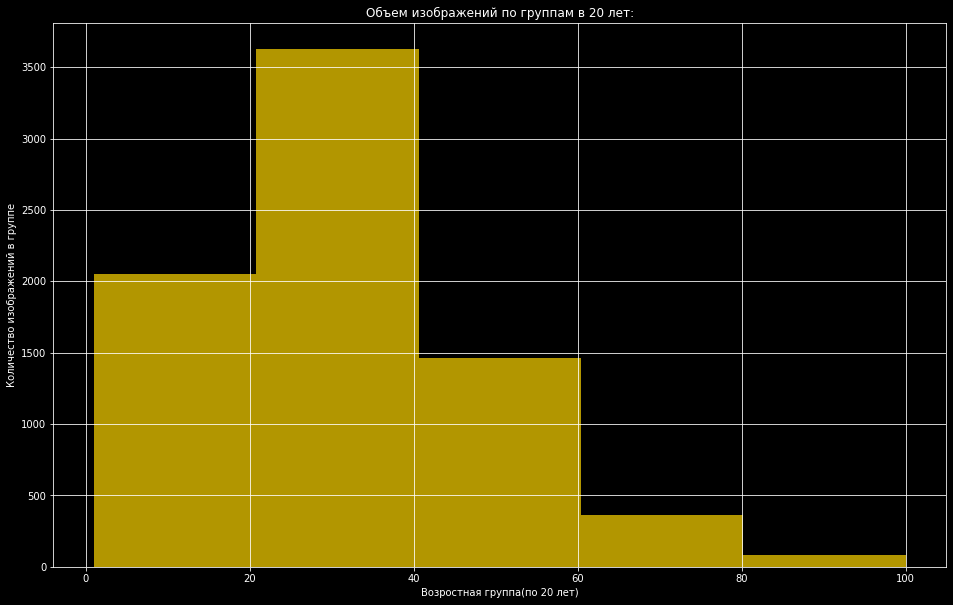

In [7]:
labels['real_age'].plot(color = 'gold',alpha = 0.7, figsize = (16,10), kind = 'hist', bins = 5, grid = True)
plt.title('Объем изображений по группам в 20 лет:')
plt.xlabel('Возрoстная группа(по 20 лет)')
plt.ylabel('Количество изображений в группе')
plt.show()

* Объем изображений для лиц старше 20 лет значительно больше, чем для других возрастов.
* Обучение на данных с подобным разбросом количеством изображений даст лучшую предсказуеммость для групп людей 20-40 лет, относительно других групп, представленных меньшим объемом. А в частности - скажется на задаче предсказания недобросовестной продажи алкоголя.

In [8]:
print("Изображений лиц младше школьного возраста:",labels[labels['real_age']
                                                          < 7 ].value_counts().sum())
print("Средний возраст в данныйх:",int(labels['real_age'].mean()))

print('Медианный возраст в данных:', int(labels['real_age'].median()))

Изображений лиц младше школьного возраста: 518
Средний возраст в данныйх: 31
Медианный возраст в данных: 29


Посмотрим на изображения людей с наименьшим и наибольшим возрастами:

Изображения людей в возрасете > 90 лет:
Возраст на изображении: 100


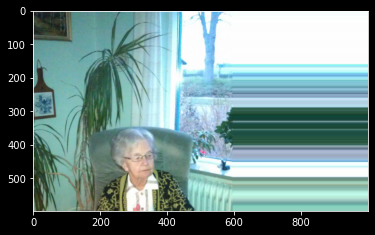

Возраст на изображении: 94


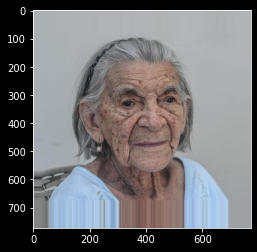

Возраст на изображении: 94


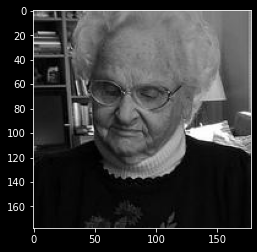

In [9]:
print('Изображения людей в возрасете > 90 лет:')
for i in range(3):
    x = labels[labels['real_age'] > 90]['file_name'].values[i]
    img = mpimg.imread(f'/datasets/faces/final_files/{x}')
    print('Возраст на изображении:',labels[labels['real_age'] > 90]['real_age'].values[i])
    imgplot = plt.imshow(img)
    plt.show()                 

Изображения людей в возрасте < 2 лет:
Возраст на изображении: 1



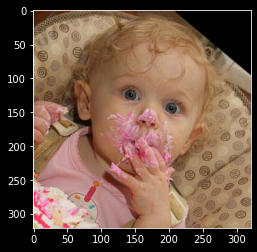

Возраст на изображении: 1



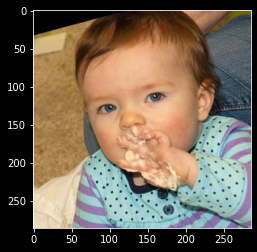

Возраст на изображении: 1



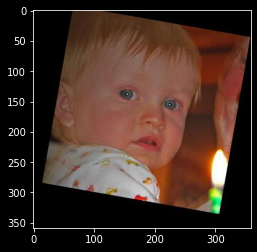

In [10]:
print('Изображения людей в возрасте < 2 лет:')
for i in range(3):
    x = labels[labels['real_age'] < 2]['file_name'].values[i]
    img = mpimg.imread(f'/datasets/faces/final_files/{x}')
    print('Возраст на изображении:',labels[labels['real_age'] < 2]['real_age'].values[i])
    print()
    imgplot = plt.imshow(img)
    plt.show()

Просмотрим информацию о первых 15 изображений:

In [11]:
datagen = ImageDataGenerator(rescale = 1/255.)

datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(200, 200),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

features, target = next(datagen_flow)

Found 7591 validated image filenames.


Название изображения:000000.jpg
Возраст на изображении: 4
Размер изображения:(114, 114, 3)


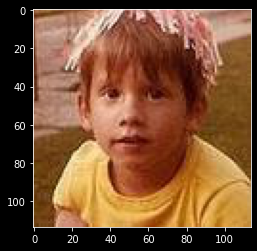

Название изображения:000001.jpg
Возраст на изображении: 18
Размер изображения:(784, 784, 3)


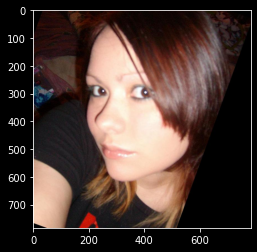

Название изображения:000002.jpg
Возраст на изображении: 80
Размер изображения:(133, 133, 3)


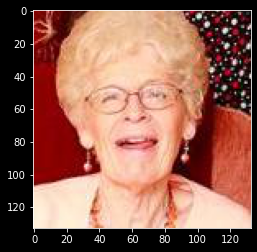

Название изображения:000003.jpg
Возраст на изображении: 50
Размер изображения:(370, 370, 3)


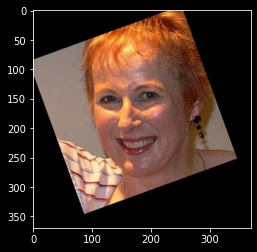

Название изображения:000004.jpg
Возраст на изображении: 17
Размер изображения:(212, 212, 3)


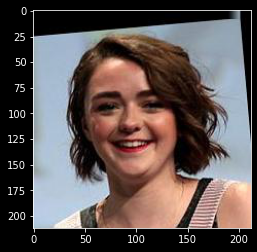

Название изображения:000005.jpg
Возраст на изображении: 27
Размер изображения:(636, 637, 3)


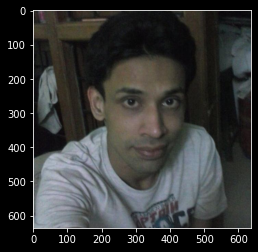

Название изображения:000006.jpg
Возраст на изображении: 24
Размер изображения:(412, 412, 3)


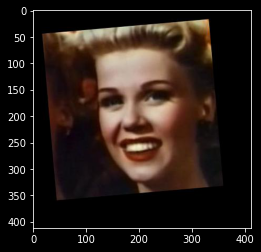

Название изображения:000007.jpg
Возраст на изображении: 43
Размер изображения:(311, 311, 3)


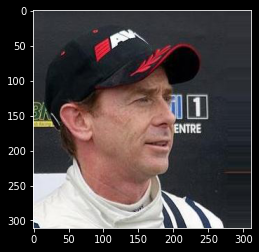

Название изображения:000008.jpg
Возраст на изображении: 26
Размер изображения:(898, 897, 3)


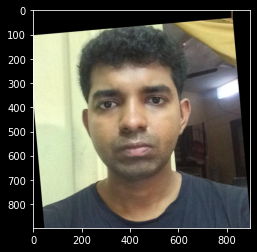

Название изображения:000009.jpg
Возраст на изображении: 39
Размер изображения:(724, 724, 3)


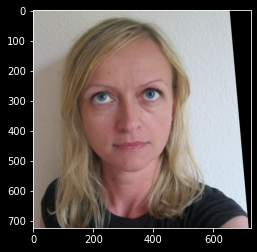

Название изображения:000010.jpg
Возраст на изображении: 17
Размер изображения:(636, 636, 3)


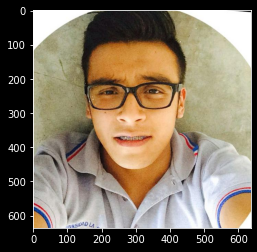

Название изображения:000011.jpg
Возраст на изображении: 51
Размер изображения:(803, 803, 3)


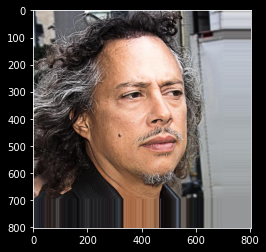

Название изображения:000012.jpg
Возраст на изображении: 2
Размер изображения:(155, 155, 3)


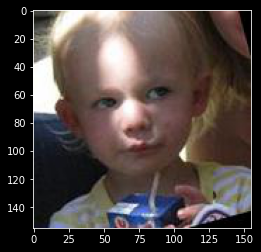

Название изображения:000013.jpg
Возраст на изображении: 1
Размер изображения:(321, 321, 3)


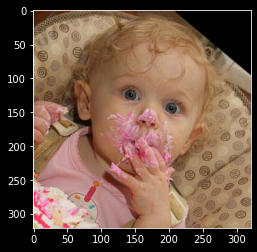

Название изображения:000014.jpg
Возраст на изображении: 6
Размер изображения:(203, 204, 3)


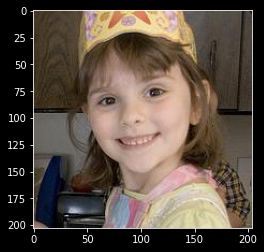

In [12]:
for i in range(15):
    pth = labels['file_name'].loc[labels.index[i]]
    print(f'Название изображения:{pth}')
    print('Возраст на изображении:',labels['real_age'].loc[labels.index[i]])
    img = mpimg.imread(f'/datasets/faces/final_files/{pth}')
    print(f'Размер изображения:{img.shape}')
    plt.imshow(img)
    plt.show()

**Итоги EDA:**

1. Набор данных имеет разброс возраста от 0 до 100 лет.
2. Всего, в наборе, 7591 RGB изображения разного размера и качества.
3. Есть пики количества изображений на возрастах кратных 5 и 10(в приоритете).
4. Изображения уже подвергались Аугментации: сдвиг\поворот\отдаление и др.
5. В данных присутствуют изображения детей дошкольного возраста, которые не могут являться покупателями. Но могут присутствовать во время оплаты, вместе с родителями, что может привести к ошибкам во время практического тестирования модели.  
6. Данная задача будет отноститься к регрессии, с применением сверточных слоёв, и одним нейроном на выходе.
7. Метрика измерения качества будет MAE


## Обучение модели

* Для обучения модели используется готовая модель ResNet50.

* Верхний слой заменен на полносвязный, с одним нейроном.

* Loss - MSE

* Метрика - MAE

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd



def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])


    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Модель определена правильно!


```
Found 5694 validated image filenames.
Found 1897 validated image filenames.

Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 29s
  245760/94765736 [..............................] - ETA: 20s
 1163264/94765736 [..............................] - ETA: 8s 
 6619136/94765736 [=>............................] - ETA: 2s
13041664/94765736 [===>..........................] - ETA: 1s
20807680/94765736 [=====>........................] - ETA: 0s
28065792/94765736 [=======>......................] - ETA: 0s
35422208/94765736 [==========>...................] - ETA: 0s
42893312/94765736 [============>.................] - ETA: 0s
50610176/94765736 [===============>..............] - ETA: 0s
57769984/94765736 [=================>............] - ETA: 0s
65118208/94765736 [===================>..........] - ETA: 0s
72630272/94765736 [=====================>........] - ETA: 0s
80396288/94765736 [========================>.....] - ETA: 0s
87654400/94765736 [==========================>...] - ETA: 0s
94773248/94765736 [==============================] - 1s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 356 steps, validate for 119 steps
Epoch 1/10
356/356 - 71s - loss: 225.3802 - mae: 10.6940 - val_loss: 512.9102 - val_mae: 17.5016
Epoch 2/10
356/356 - 44s - loss: 71.2611 - mae: 6.3876 - val_loss: 218.4569 - val_mae: 11.0808
Epoch 3/10
356/356 - 46s - loss: 36.6404 - mae: 4.6726 - val_loss: 81.7649 - val_mae: 7.1128
Epoch 4/10
356/356 - 46s - loss: 23.9349 - mae: 3.7822 - val_loss: 75.4656 - val_mae: 6.3813
Epoch 5/10
356/356 - 45s - loss: 19.0785 - mae: 3.3182 - val_loss: 72.0438 - val_mae: 6.3699
Epoch 6/10
356/356 - 56s - loss: 14.9392 - mae: 2.9393 - val_loss: 80.5549 - val_mae: 6.9894
Epoch 7/10
356/356 - 72s - loss: 11.8044 - mae: 2.6302 - val_loss: 72.2790 - val_mae: 6.5424
Epoch 8/10
356/356 - 80s - loss: 10.6348 - mae: 2.4418 - val_loss: 68.1346 - val_mae: 6.2118
Epoch 9/10
356/356 - 70s - loss: 10.4031 - mae: 2.4382 - val_loss: 72.0916 - val_mae: 6.4842
Epoch 10/10
356/356 - 80s - loss: 10.1799 - mae: 2.4085 - val_loss: 70.7503 - val_mae: 6.2198
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 12s - loss: 70.7503 - mae: 6.2198
Test MAE: 6.2198

```

## Анализ обученной модели

Обученная модель, на тестовой выборке, показала точность MAE в **6.2198**, что равно разбросу лет на которые, в среднем, ошибается модель.


* Модель компьтерного зрения способна, частично, решить поставленную задачу, а именно:
            1. Разброс точности не позволяет эффективно контролировать продажу алкоголя с помощью данной модели.
            
            2. Модель может показать эффективность в определении возрастной группы покупателя, для анализа покупок и   
            предложения товара, но только в том случае, если "группа" будет определена большим промежутков возраста, чтобы 
            наиболее невелировать погрешность модели. 


* Для решения задачи "добросовестной продажи алкоголя" требуется улучшение набора данных для обучения, где выброка будет болше и сбалансированней по возрастам представителей. 


Проблемы используемного набора данных:
1. Объем изображений для группы людей 20-30 лет значительно больше чем для группы 10-20 лет.
2. В наборе наблюдается **возможное** округление возраста на 5 лет, что может выражаться пиками количества избражений лиц возраста, кратного 5.
3. Данные в наборе заранее поддавались аугментации, что **не позволяет** отрицать отсутствие скрытых дубликатов.

